In [20]:
#from braindecode.datasets.tuh import _TUHMock as TUH
from braindecode.datasets import TUH
import seaborn as sns

In [14]:
tuh = TUH(
    path="~/data/tuh_eeg/",
    recording_ids=None,
    target_name=('age', 'gender'),  # use both age and gender as decoding target
    preload=False,
    add_physician_reports=False,
)
tuh.description

Creating RawArray with float64 data, n_channels=21, n_times=3600
    Range : 0 ... 3599 =      0.000 ...   359.900 secs
Ready.
Creating RawArray with float64 data, n_channels=21, n_times=3600
    Range : 0 ... 3599 =      0.000 ...   359.900 secs
Ready.
Creating RawArray with float64 data, n_channels=21, n_times=3600
    Range : 0 ... 3599 =      0.000 ...   359.900 secs
Ready.
Creating RawArray with float64 data, n_channels=21, n_times=3600
    Range : 0 ... 3599 =      0.000 ...   359.900 secs
Ready.
Creating RawArray with float64 data, n_channels=21, n_times=3600
    Range : 0 ... 3599 =      0.000 ...   359.900 secs
Ready.


,path,version,year,month,day,subject,session,segment,age,gender
0,tuh_eeg/v1.1.0/edf/02_tcp_le/000/00000058/s001...,v1.1.0,2003,2,5,58,1,0,0,M
1,tuh_eeg/v1.1.0/edf/01_tcp_ar/099/00009932/s004...,v1.1.0,2014,9,30,9932,4,13,53,F
2,tuh_eeg/v1.1.0/edf/03_tcp_ar_a/123/00012331/s0...,v1.1.0,2014,12,14,12331,3,2,39,M
3,tuh_eeg/v1.1.0/edf/01_tcp_ar/000/00000000/s001...,v1.1.0,2015,12,30,0,1,0,37,M
4,tuh_eeg/v1.2.0/edf/03_tcp_ar_a/149/00014928/s0...,v1.2.0,2016,1,15,14928,4,7,83,F


In [15]:
type(tuh)

braindecode.datasets.tuh._TUHMock

<AxesSubplot:>

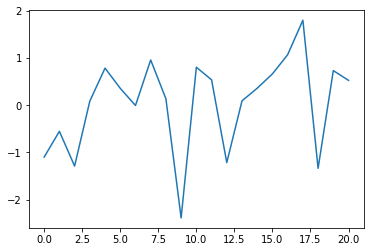

In [19]:
wf, meta = tuh[-1]
sns.lineplot(x=range(0, wf.shape[0]), y=wf[:,0])